# Week6 Lab

## Download & Extract Data

Programmatically download the zip file & extract

In [1]:
from urllib import request

def download_file(file_name, url):
    res = request.urlopen(url)
    with open(file_name,'wb') as file:
        file.write(res.read())
        
file_url = 'https://github.com/msaricaumbc/DS_data/blob/master/lab_data.zip?raw=true'
file_name = 'lab_data.zip'

In [2]:
download_file(file_name,file_url)


In [3]:
from zipfile import ZipFile
def unzip(file_name, path='./'):
    with ZipFile(file_name, 'r') as zip:
        zip.printdir()
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!') 
unzip(file_name)

File Name                                             Modified             Size
PoliceShootingsUS.csv                          2021-09-21 20:53:54       227653
__MACOSX/._PoliceShootingsUS.csv               2021-09-21 20:53:54          276
volunteers.txt                                 2021-10-06 00:32:28         7015
__MACOSX/._volunteers.txt                      2021-10-06 00:32:28          176
Extracting all the files now...
Done!


## Reading data from a csv file

For the file `PoliceShootingsUS.csv`, please answer the following questions:

* How many offenders are older than 55? 

In [4]:
## Your code is here
import pandas as pd
Police_DATA=pd.read_csv('PoliceShootingsUS.csv',encoding='Windows_1252')
Police_DATA

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [5]:
Police_DATA[Police_DATA.age>55]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
19,38,Jimmy Foreman,09/01/15,shot,gun,71.0,M,W,England,AR,False,attack,Not fleeing,False
29,52,Talbot Schroeder,14/01/15,shot,knife,75.0,M,W,Old Bridge,NJ,False,attack,Not fleeing,False
30,54,Robert Edwards,14/01/15,shot,gun,68.0,M,W,Lake Jackson,TX,False,attack,Not fleeing,False
43,83,Carter Castle,18/01/15,shot and Tasered,gun,67.0,M,W,Gunlock,KY,True,attack,Not fleeing,False
52,336,Robert Francis Mesch,23/01/15,shot,gun,61.0,M,W,Austin,TX,True,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,2692,Lawrence Heyward Jr.,25/06/17,shot,gun,56.0,M,B,North Charleston,SC,False,undetermined,Foot,False
2490,2775,Stephen Steele,13/07/17,shot,knife,56.0,M,NaN,Crystal Springs,FL,True,other,Not fleeing,False
2502,2787,Robert Earl Vaughan,18/07/17,shot,gun,70.0,M,NaN,Springfield,OR,True,other,Not fleeing,False
2512,2796,Michael Caponigro,23/07/17,shot,gun,59.0,M,W,Eau Claire,WI,True,attack,Not fleeing,False


In [6]:
Police_DATA[Police_DATA.age>55].count()

id                         235
name                       235
date                       235
manner_of_death            235
armed                      234
age                        235
gender                     235
race                       211
city                       235
state                      235
signs_of_mental_illness    235
threat_level               235
flee                       228
body_camera                235
dtype: int64

* What's the age distribution?

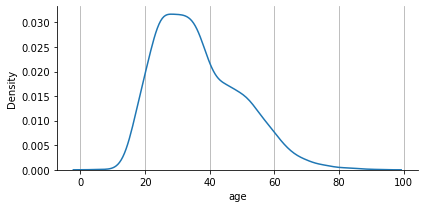

In [7]:
## Your code is here
import seaborn as sns
plot = sns.displot(data = Police_DATA, x= 'age', kind = 'kde', height= 3, aspect = 2)
plot.ax.grid(axis = 'x')



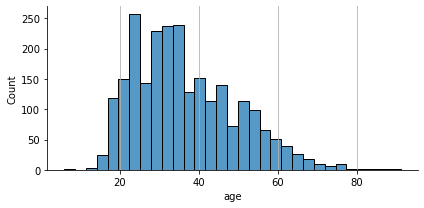

In [8]:
plot = sns.displot(data = Police_DATA, x= 'age', kind = 'hist', height= 3, aspect = 2)
plot.ax.grid(axis = 'x')


## Dirty data

Read `volunteers.txt` file and perform the following action:

* Create a dataframe with columns: Name, Lastname, State

In [9]:
## Your code is here
names=[]
lastnames = []
states = []

with open('volunteers.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        line = line \
        .replace(('"'), ',') \
        .replace(('['), ',') \
        .replace((']'), ',') \
        .replace(('('), ',') \
        .replace((')'), ',') \
        .replace(('-'), ',')
        parts = line.split(',')
        lastname = parts[3].strip()
        name = parts[4].strip()
        state = parts[6].strip()
        names.append(name)
        lastnames.append(lastname)
        states.append(state)
df = pd.DataFrame()
df['Names'] = names
df['lastname'] = lastnames
df['State'] = states
df

,Names,lastname,State
0,Christine,Harding,Virginia
1,Kimberly,Davis,New York
2,Rachel,Ingram,Louisiana
3,Richard,Walker,Oregon
4,Francisco,Barnes,Virginia
...,...,...,...
95,Kevin,Smith,North Dakota
96,Mark,Moore,Alaska
97,Jennifer,Landry,Wyoming
98,Lori,Phillips,Arkansas
